# Résolution d'Équations aux Dérivées partielles I

Objectifs :

- Résolution numérique par différences finies de l'équation de la chaleur $[a,b]$, par les méthodes d'Euler explicites et implicites.

- Mise en évidence numérique d'instabilités lorsque la condition CFL n'est pas satisfaite.

- Mise en évidence du comportement en temps long de la solution.

## L'équation de la chaleur sur $[a,b]$

### Résolution théorique

Pour $a<b$ et $f\in \mathcal C([a,b])$ on considère l'équation de la chaleur avec conditions nulles de Dirichlet au bord :
$$
(1)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)-\frac{\partial^2 u}{\partial x^2}(x,t)=f(x), \qquad \forall (x,t)\in (a,b)\times (0,\infty)\\
u(a,t)=0, \quad u(b,t)=0 , \qquad \forall t>0\\
u(x,0)=u_0(x) , \qquad \forall x\in (a,b) \\
\end{array} \right.
$$
On rappelle le résultat théorique suivant :

__Proposition 1 [Résolution de la chaleur 1d dans l'espace $C^{1,2}$]__ Soit $f,u_0\in C([a,b],\mathbb R)$. On pose $E=[a,b]\times [0,\infty)\backslash (\{a,0\}\cup \{b,0\})$ et $F=[a,b]\times (0,\infty)$.  Alors il existe une unique fonction $u\in C(E)$ qui est une fois continument différentiable par rapport à $t$ et deux fois continument différentiable par rapport à $x$ dans $F$ et qui résout (3).

La preuve de la Proposition 1 est proposée en exercice à la fin de ce document.

## Résolution de l'équation de la chaleur par différences finies en utilisant un schéma d'Euler explicite en temps

On souhaite maintenant résoudre numériquement (1) sur un intervalle de temps $[0,T_0]$. Pour $N\geq 1$ et $K\geq 2$ on pose $\Delta x=\frac{b-a}{N+1}$, $\Delta t=\frac{T_0}{K-1}$, $x_i=a+(i+1)\Delta x$ et $t_k=k\Delta t$. On remarque que $x_{-1}=a$, $x_N=b$, $t_0=0$ et $t_{K-1}=T_0$.

L'idée est de calculer approximativement $\frac{\partial^2}{\partial x^2}u(x_i,t_k)$ et $\frac{\partial}{\partial t}u(x_i,t_k)$ en fonction de $u(x_{i-1},t_k)$, $u(x_i,t_k)$, $u(x_{i+1},t_k)$ et $u(x_i,t_{k+1})$. À l'aide de la formule de Taylor on a si $u$ est assez régulière
$$
u(x_i,t_{k+1})=u(x_i,t_{k})+\Delta t\frac{\partial}{\partial t}u(x_i,t_k)+O((\Delta t)^2).
$$
Donc
$$
\frac{\partial}{\partial t}u(x_i,t_k)=\frac{u(x_i,t_{k+1})-u(x_i,t_k)}{\Delta t}+O(\Delta t).
$$
On rappelle également la formule vue dans la feuille de TP EDP 1 :
$$
(2)\qquad \frac{\partial^2}{\partial x^2} u(x_i,t_k)=\frac{u(x_{i-1},t_k)-2u(x_i,t_k)+u(x_{i+1},t_k)}{(\Delta x)^2}+O(\Delta x).
$$
En combinant ces deux identités et (1) on obtient :
$$
(3)\qquad \frac{u(x_i,t_{k+1})-u(x_i,t_k)}{\Delta t}+\frac{-u(x_{i-1},t_k)+2u(x_i,t_k)-u(x_{i+1},t_k)}{(\Delta x)^2}=f(x_i)+O(\Delta t+\Delta x)
$$

On approxime $u(x_i,t_k)$ par $v_{i,k}$, donné par le schéma aux différences finies où l'on a enlevé le terme de reste dans (3) :
$$
(4)\qquad \qquad \left\{ \begin{array}{lll}
v_{-1,k}=0,& \qquad \forall k\in \{0,...,K-1\},\\
v_{N,k}=0,& \qquad \forall k\in \{0,...,K-1\},\\
\frac{v_{i,k+1}-v_{i,k}}{\Delta t}-\frac{v_{i+1,k}-2v_{i,k}+v_{i-1,k}}{\Delta x^2}=f(x_i),& \qquad \forall (i,k)\in \{0,..., N-1\}\times \{0,...,K-1\},\\
v_{i,0}=u_0(x_i),& \qquad \forall i\in \{0,...,N-1\}
\end{array} \right.
$$
La solution de (4) est donnée par la suite de vecteurs $(v_{\cdot,k})_{0\leq k \leq K-1}^T$ avec $v_{\cdot,k}^T=(v_{-1,k},v_{0,k},...,v_{N,k})=(0,\tilde V_k^T,0)$ avec $\tilde V_k=(v_{0,k},...,v_{N-1,k})^T$ solution de :
$$
\left\{ \begin{array}{l l} \tilde V_0=(u_0(x_0),...,u_0(x_{N-1})),\\
\tilde V_{k+1}=\tilde V_k-\frac{\Delta t}{\Delta x^2}M\tilde V_k +\Delta t F, 
\end{array} \right.
$$
où :
$$
M=\begin{pmatrix} 2&-1 & & &(0) \\
-1&2&-1& & \\
&.&.&.& \\
&&-1& 2& -1\\
(0)&&& -1&2
\end{pmatrix} , \qquad F=\begin{pmatrix}f(x_0) \\ f(x_1) \\ . \\ f(x_{N-2}) \\ f(x_{N-1})  \end{pmatrix}
$$
La fonction `chaleur_eulerexplicite(a,b,T0,f,u0,N,K)` calcule la solution $(\tilde V_k)_{0\leq k \leq K-1}$ par cette méthode :

In [3]:
def chaleur_eulerexplicite(a,b,T0,f,u0,N,K):
    Delta_x=(b-a)/(N+1)
    Delta_t=T0/(K-1)
    X=np.array([(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=Vtilde[:,k]-(Delta_t/Delta_x**2)*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+2,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=0
        V[N+1,k]=0
    return(V)

On illustre la fonction `chaleur_eulerexplicite` ci-dessous avec $a=0$ et $b=1$ pour l'exemple d'une fonction indicatrice comme donnée initiale :
$$
u_0(x)=\left\{ \begin{array}{l l} 1 \qquad \mbox{si } |x-\frac 12|<\frac{1}{4}, \\ 0 \qquad \mbox{sinon} .
\end{array} \right.
$$
et pour un forçage nul $f=0$.

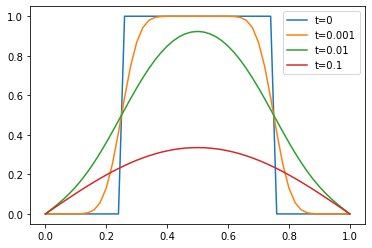

In [6]:
import numpy as np
from matplotlib import pyplot as plt
def u0_2(x):
    if abs(x-1/2)<1/4:
        return(1)
    else:
        return(0)
def f2(x):
    return(0)
x2=np.linspace(0,1,51)
V2=chaleur_eulerexplicite(0,1,1,f2,u0_2,49,10001)
V2_0=V2[:,0]
V2_1=V2[:,10]
V2_2=V2[:,100]
V2_3=V2[:,1000]
plt.plot(x2,V2_0,label="t=0")
plt.plot(x2,V2_1,label="t=0.001")
plt.plot(x2,V2_2,label="t=0.01")
plt.plot(x2,V2_3,label="t=0.1")
plt.legend()

On rappelle que la condition (CFL) du schéma (4) est :
$$
(5)\qquad \frac{\Delta t}{\Delta x^2}<\frac 12.
$$
Dans l'illustration numérique ci-dessus, on on choisi $\Delta x=\frac{1}{50}$ et $\Delta t=\frac{1}{10000}$. On a donc $\frac{\Delta t}{\Delta x^2}=\frac 14$, et la condition (CFL) (5) est bien remplie. Dans l'Exercice 1 nous verrons que lorsque la condition (CFL) (5) n'est pas remplie le schéma présente des instabilités.

## Résolution de l'équation de la chaleur par différences finies en utilisant un schéma d'Euler implicite en temps

On souhaite maintenant résoudre numériquement (1) sur un intervalle de temps $[0,T_0]$, mais à l'aide d'un schéma d'Euler implicite en temps. On prend comme dans la section précédente $N\geq 1$ et $K\geq 2$, et on pose $\Delta x=\frac{b-a}{N+1}$, $\Delta t=\frac{T_0}{K-1}$, $x_i=a+(i+1)\Delta x$ et $t_k=k\Delta t$.

On utilise que si $u$ est assez régulière :
$$
\frac{\partial^2}{\partial x^2} u(x_i,t_k)=\frac{\partial^2}{\partial x^2} u(x_i,t_{k+1})+O(\Delta t)
$$
En combinant cette identité, (2) et (1) on obtient :
$$
(6)\qquad \frac{u(x_i,t_{k+1})-u(x_i,t_k)}{\Delta t}+\frac{-u(x_{i-1},t_{k+1})+2u(x_i,t_{k+1})-u(x_{i+1},t_{k+1})}{(\Delta x)^2}=f(x_i)+O(\Delta t+\Delta x)
$$

On résout numériquement en approximant $u(x_i,t_k)$ par $v_{i,k}$, en supprimant le terme de reste dans (6). Cela donne le schéma implicite en temps :
$$
(7)\qquad \qquad \left\{ \begin{array}{l l}
v_{-1,k}=0, \qquad \forall k\in \{0,...,K-1\},\\
v_{N,k}=0, \qquad \forall k\in \{0,...,K-1\},\\
\frac{v_{i,k+1}-v_{i,k}}{\Delta t}-\frac{v_{i+1,k+1}-2v_{i,k+1}+v_{i-1,k+1}}{\Delta x^2}=f(x_i) \qquad \forall (i,k)\in \{0,..., N-1\}\times \{0,...,K-1\},\\
v_{i,0}=u_0(x_i), \qquad \forall i\in \{0,...,N-1\}
\end{array} \right.
$$
La solution de (7) est donnée par la suite de vecteurs $(v_{\cdot,k})_{0\leq k \leq K-1}^T$ avec $v_{\cdot,k}^T=(v_{-1,k},v_{0,k},...,v_{N,k})=(0,\tilde V_k^T,0)$ avec $\tilde V_k=(v_{0,k},...,v_{N-1,k})^T$ solution de :
$$
\left\{ \begin{array}{l l} \tilde V_0=(u_0(x_0),...,u_0(x_{N-1})),\\
\left(\text{Id}+\frac{\Delta t}{\Delta x^2}M\right)\tilde V_{k+1}=\tilde V_k +\Delta t F, 
\end{array} \right.
$$
où comme avant :
$$
M=\begin{pmatrix} 2&-1 & & &(0) \\
-1&2&-1& & \\
&.&.&.& \\
&&-1& 2& -1\\
(0)&&& -1&2
\end{pmatrix} , \qquad F=\begin{pmatrix}f(x_0) \\ f(x_1) \\ . \\ f(x_{N-2}) \\ f(x_{N-1})  \end{pmatrix}
$$
La fonction `chaleur_eulerexplicite(a,b,T0,f,u0,N,K)` calcule la solution $(\tilde V_k)_{0\leq k \leq K-1}$ par cette méthode :

In [129]:
import numpy as np
def chaleur_eulerimplicite(a,b,T0,f,u0,N,K):
    Delta_x=(b-a)/(N+1)
    Delta_t=T0/(K-1)
    X=np.array([(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)
    matrice=np.identity(N)+(Delta_t/(Delta_x**2))*M
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=np.linalg.solve(matrice,Vtilde[:,k]+Delta_t*F)
    V=np.zeros([N+2,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=0
        V[N+1,k]=0
    return(V)

On teste illustre l'utilisation de la fonction `chaleur_eulerexplicite` ci-dessous avec $a=0$ et $b=1$ pour l'exemple d'une donnée initiale nulle $u_0=0$ et d'une fonction de forçage $f(x)=e^x$.

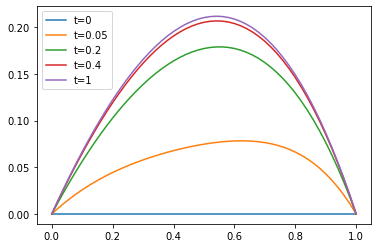

In [130]:
def u0_3(x):
    return(0)
def f3(x):
    return(np.exp(x))
x3=np.linspace(0,1,51)
V2=chaleur_eulerimplicite(0,1,1,f3,u0_3,49,101)
V2_0=V2[:,0]
V2_1=V2[:,5]
V2_2=V2[:,20]
V2_3=V2[:,40]
V2_4=V2[:,100]
plt.plot(x2,V2_0,label="t=0")
plt.plot(x2,V2_1,label="t=0.05")
plt.plot(x2,V2_2,label="t=0.2")
plt.plot(x2,V2_3,label="t=0.4")
plt.plot(x2,V2_4,label="t=1")
plt.legend()

__Remarque__ On remarque qu'on a pu choisir $\Delta x=\frac{1}{50}$ et $\Delta t=\frac{1}{100}$. La condition (CFL) (5) du schéma d'Euler explicite n'est donc pas remplie car :
$$
\frac{\Delta t}{\Delta x^2}=25>\frac{1}{2}.
$$
En revanche, on a pu constater que le schéma numérique implicite n'a pas eu de problème d'instabilité. On a donc illustré numériquement le fait que le schéma d'Euler implicite est inconditionnellement stable (il n'y a pas besoin de contrainte sur les pas de discrétisation en temps et en espace, comme par exemple la condition (CFL), pour qu'il soit stable).

### Exercices numériques

__Exercice 1 [Instabilités du schéma d'Euler explicite si la condition (CFL) n'est pas remplie]__

__1.__ Utilisez à nouveau le code de `chaleur_eulerexplicite` sur l'exemple de votre choix, mais avec des valeurs de $\Delta t$ et de $\Delta x$ telles que $\frac{\Delta t}{\Delta x^2}\geq\frac 12$. Que constatez-vous ?

__2.__ En déduire numériquement que la méthode de résolution de l'équation de la chaleur par différences finies avec un schéma d'Euler explicite en temps semble instable si la condition (CFL) n'est pas remplie.

__Exercice 2 [Comportement en temps long de l'équation de la chaleur]__

__1.__ Utilisez à nouveau le code de `chaleur_eulerexplicite` sur l'exemple de votre choix mais sans forçage, c'est-à-dire avec $f=0$. Représentez graphiquement la solution pour une suite de temps $t_0<t_1<...<t_n$ de votre choix. Que constatez-vous ?

__2.__ En déduire numériquement que la solution de l'équation de la chaleur sur $(a,b)$ sans forçage semble converger vers la fonction nulle lorsque $t\to \infty$.

__3.__ Utilisez à nouveau le code de `chaleur_eulerexplicite` sur l'exemple de votre choix mais avec un forçage non nul, c'est-à-dire avec $f\neq 0$. Représentez graphiquement la solution pour une suite de temps $t_0<t_1<...<t_n$ de votre choix. Que constatez-vous ?

__4.__ Ajouter à la représentation graphique précédente la solution $v$ de $-v''(x)=f(x)$ sur $(a,b)$ avec $v(a)=v(b)=0$ calculée numériquement à l'aide du code `poisson_dirichlet` de la feuille de TP EDP I précédente. Que constatez-vous ?

__5.__ En déduire numériquement que la solution de l'équation de la chaleur sur (a,b) avec forçage converge lorsque $t\to \infty$ vers la solution du problème de Poisson avec le même terme de forçage.

__Exercice 3__

On souhaite maintenant résoudre numériquement l'équation de la chaleur dans le cas de conditions de Dirichlet au bord, et d'un forçage qui dépend du temps :
$$
\left\{ \begin{array}{l l}
\frac{\partial u}{\partial t} (x,t)-\frac{\partial^2 u}{\partial x^2}(x,t)=f(x,t), \qquad \forall (x,t)\in (a,b)\times (0,\infty)\\
u(a,t)=\alpha, \quad u(b,t)=\beta, \qquad \forall t>0\\
u(x,0)=u_0(x) , \qquad \forall x\in (a,b) \\
\end{array} \right.
$$
Reprenez le code de `chaleur_eulerexplicite` ou celui de `chaleur_eulerimplicite` pour proposer un schéma numérique de résolution. Vous pourrez vous inspirer de la méthode des différences finies pour le problème de Poisson sur $(a,b)$ présentées dans la feuille de TP EDP I.

Illustrer votre code sur un exemple de votre choix.

### Preuve de la Proposition 1 en exercice à la main guidé

La suite des exercices vise maintenant à démontrer la Proposition 1. La preuve repose sur plusieurs résultats intermédaires qui ont leur intérêt propre et qui font chacun l'objet d'un exercice.

On va utiliser la méthode dite des fonctions de Green. L'idée est d'étudier en premier une solution particulière, appelée solution de Green du problème, et ensuite d'utiliser cette solution particulière pour étudier toutes les autres solutions. En particulier, on obtient une formule explicite pour n'importe quelle solution, appelée formule de représentation. Cette stratégie ne s'applique pas à toute les équations aux dérivées partielles, mais lorsqu'elle s'applique elle est à la fois la plus simple et la plus efficace car elle permet d'obtenir une formule explicite pour les solutions.

Le premier résultat intermédiaire donne une formule et des propriétés de la fonction de Green pour l'équation de la chaleur sur $\mathbb R$.

__Lemme 1.__ La fonction $K(x,t):\mathbb R \times (0,\infty)\rightarrow \mathbb R$ définie par :
$$
K(x,t)=\frac{1}{\sqrt{4\pi t} } e^{-\frac{x^2}{4t}}
$$
satisfait les propriétés suivantes. Premièrement, $K\in C^\infty (\mathbb R \times (0,\infty))$ et pour tous $t>0$ et $x\in \mathbb R$ on a :
$$
(4) \qquad \qquad \frac{\partial K}{\partial t}(x,t)-\frac{\partial^2 K}{\partial x^2}(x,t)=0.
$$
De plus, pour tout $t>0$ on a :
$$
(5)\qquad \qquad \int_{\mathbb R} K(x,t)dx=1 .
$$
Enfin, soit $u \in L^\infty(\mathbb R,\mathbb R)$ et $x_0\in \mathbb R$ tel que $u $ est continue en $x_0$. Alors :
$$
(6) \qquad \qquad \lim_{(x,t)\rightarrow (x_0,0), \ t>0} \int_{\mathbb R}K(t,y-x)u(y)dy= u(x)
$$

__Exercice 4 (Preuve du Lemme 1)__

__1.__ Montrer par un calcul que $K$ satisfait (4).

__2.__ Montrer que (5) est vrai pour $t=1$ par un calcul explicite de l'intégrale de la fonction Gaussienne. Montrer ensuite que (5) est vrai pour tout $t>0$ en effectuant un changement de variable dans l'intégrale.

__3.__ Montrer, en utilisant (5), que pour tout $\epsilon>0$:
$$
\lim_{t\rightarrow 0, \ t>0} \int_{x\in (-\infty,-\epsilon)\cup (\epsilon,\infty)} K(x,t)dx=0 \quad \mbox{et} \quad \lim_{t\rightarrow 0, \ t>0} \int_{x\in [-\epsilon,\epsilon]} K(x,t)dx=1.
$$
En déduire (6) en utilisant la continuité de $u$.

Le second résultat intermédiaire résout l'équation de la chaleur sur $\mathbb R$. Celle-ci est plus simple que la résolution de l'équation de la chaleur sur $(a,b)$ car on a pas de conditions au bord dont il faut tenir compte.

__Lemme 2.__ Soit $v_0\in L^\infty(\mathbb R)$, alors la fonction $v:\mathbb R \times (0,\infty)\rightarrow \mathbb R$ définie par
$$
(7) \qquad \qquad v(x,t)= \int_{\mathbb R} K(x-y,t) v_0(y)dy,
$$
est telle que $v\in C^2(\mathbb R \times (0,\infty),\mathbb R)$ et elle satisfait :
$$
(8)\qquad \qquad \frac{\partial v}{\partial t} (x,t)-\frac{\partial^2 v}{\partial x^2}u(x,t)=0, \qquad \forall (x,t)\in \mathbb R\times (0,\infty).
$$
De plus, si $x_0\in \mathbb R$ est un point tel que $v_0$ est continue en $x_0$, alors :
$$
(9)\qquad \qquad \lim_{(x,t)\rightarrow (x_0,0), \ t>0} v(x,t)= v_0(x_0)
$$

__Exercice 5 (preuve du Lemme 2).__ 

__1.__ Montrer, en utilisant le lemme de différentiation sous le signe intégral, que sous les hypothèses du Lemme, $v$ défini par (7) satisfait $v\in C^2(\mathbb R \times (0,\infty),\mathbb R)$.

__2.__ Montrer, en utilisant le résultat de la question __1.__ et (4) que $v$ satisfait (8).

__2.__ Montrer, en utilisant (6), que $v$ satisfait (9).

On peut maintenant prouver la Proposition 1 en utilisant les Lemmes 1 et 2, et un argument d'extension qui ramène l'étude de l'équation de l'équation de la chaleur sur $(a,b)$ à celle sur $\mathbb R$.

__Exercice 6 (Preuve de la Proposition 1).__ 

__1.__ Montrer, que $u$ satisfait $\frac{\partial u}{\partial t} (x,t)-\frac{\partial^2 u}{\partial x^2}(x,t)=f(x)$ pour tous $(x,t)\in [a,b]\times (0,\infty)$ si et seulement si la fonction $\tilde u$ définie par $\tilde u(t,x)=u(a+(b-a)x,(b-a)^2t)$ satisfait $\frac{\partial \tilde u}{\partial t} (x,t)-\frac{\partial^2 \tilde u}{\partial x^2}(x,t)=\tilde f(x)$ pour tous $(x,t)\in [0,1]\times (0,\infty)$ avec $\tilde f(x)=(b-a)^2f(a+(b-a)x)$. En déduire que si la proposition est vraie pour $a=0$ et $b=1$, alors elle est vraie pour tous $a<b$.

On suppose donc dorénavant $a=0$ et $b=1$ sans perte de généralité.

__2.__ On définit $v_0\in C^2([a,b],\mathbb R)$ comme étant la solution de $-v_0''(x)=f(x)$ sur $(0,1)$ avec $v_0(0)=v_0(1)=0$ donnée par la Proposition 1 de la feuille de TP EDP I sur l'équation de Poisson. On pose alors :
$$
v(x,t)=v_0(x).
$$
Montrer que $v\in C^2(E,\mathbb R)$ est solution de :
$$
(10)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial v}{\partial t} (x,t)-\frac{\partial^2 v}{\partial x^2}(x,t)=f(x), \qquad \forall (x,t)\in (0,1)\times (0,\infty)\\
v(0,t)=0, \quad v(1,t)=0 , \qquad \forall t>0\\
v(x,0)=v_0(x) , \qquad \forall x\in (0,1) \\
\end{array} \right.
$$

On définit alors $w_0:[0,1]\rightarrow \mathbb R$ par :
$$
w_0(x)=u_0(x)-v_0(x)
$$

__3.__ On définit ensuite $\bar{w}_0:[-1,1]\rightarrow \mathbb R$ comme suit :
$$
\bar{w}_0(x)= \left\{ \begin{array}{l l} w_0(x) \qquad \mbox{si }x\in (0,1),\\
-w_0(-x) \qquad \mbox{si }x\in (-1,0), \\
0 \qquad \mbox{si }x\in \{-1,0,1\}.
\end{array} \right.
$$
Montrer que $\bar{w}_0$ est impaire en $x$, que $\bar{w}_0(x)=w_0(x)$ pour tout $x\in (0,1)$, et que $\bar{w}_0$ est continue sur $(-1,0)\cup(0,1)$.

__4.__ On définit enfin $\tilde{w}_0:\mathbb R\rightarrow \mathbb R$ comme suit. En écrivant tout $x\in \mathbb R$ sous la forme (unique) $x=2k+\bar x$ avec $k\in \mathbb Z$ et $-1\leq \bar x<1$:
$$
\tilde{w}_0(x)= \bar{w}_0(\bar x).
$$
En vous aidant du résultat de la question __3.__, montrer que $\tilde w_0$ est périodique en $x$ de période 2, que $\tilde{w}_0$ est impaire en $x$, que $\tilde w_0(x)=w_0(x)$ pour tout $x\in (0,1)$, et que $\tilde{w}_0$ est continue sur $\mathbb R \backslash \mathbb Z$.

__5.__ On définit la fonction $\tilde w:\mathbb R \times [0,\infty)\rightarrow \mathbb R$ par $\tilde w(x,0)=\tilde w_0(x)$ pour tout $x\in \mathbb R$, et pour $t>0$ et $x\in \mathbb R$ par:
$$
\tilde w(x,t)= \int_{\mathbb R} K(x-y,t) \tilde w_0(y)dy.
$$
Montrer, en utilisant le résultat de la question __4.__ et le Lemme précédent, que $\tilde w\in C^2(\mathbb R \times (0,\infty),\mathbb R)$ et que $\tilde w$ satisfait :
$$
(11)\qquad \qquad \frac{\partial \tilde w}{\partial t} (x,t)-\frac{\partial^2 \tilde w}{\partial x^2}(x,t)=0, \qquad \forall (x,t)\in \mathbb R\times (0,\infty),
$$
et que de plus, si $x_0\in (0,1)$ alors :
$$
(12)\qquad \qquad \lim_{(x,t)\rightarrow (x_0,0), \ t>0} \tilde w(x,t)= w_0(x_0)
$$

__6.__ Montrer, en utilisant que $\tilde w_0$ est impaire en $x$ et est périodique de période $2$, que $\tilde w(0,t)=0$ et $\tilde w(1,t)=0$ pour tout $t\geq 0$.

__7.__ On définit alors $w:[0,1]\times [0,\infty)\rightarrow \mathbb R$ comme étant la restriction de $\tilde w$, c'est-à-dire que $w(x,t)=\tilde w(x,t)$ pour tout $(x,t)\in [0,1]\times [0,\infty)$. Montrer, en utilisant (11), (12), et la question __6.__, que $w\in C(E,\mathbb R)$ et $w\in C^2(F,\mathbb R)$ et que $w$ est solution de :
$$
(13)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial w}{\partial t} (x,t)-\frac{\partial^2 w}{\partial x^2}(x,t)=0, \qquad \forall (x,t)\in (0,1)\times (0,\infty)\\
w(0,t)=0, \quad w(1,t)=0 , \qquad \forall t>0\\
w(x,0)=w_0(x) , \qquad \forall x\in (0,1) \\
\end{array} \right.
$$

__8.__ On définit finalement $u$ par
$$
u=v+w.
$$
Montrer, en utilisant les questions __2.__ et __7.__, que $u\in C(E,\mathbb R)$ et $u\in C^2(F,\mathbb R)$, et que $u$ résout l'équation (3).

__9.__ On suppose qu'il existe une fonction $\bar u\in C(E)$ qui est une fois continument différentiable par rapport à $t$ et deux fois continument différentiable par rapport à $x$ dans $F$ et qui résout (3). On pose :
$$
U=u-\bar u.
$$
Montrer que $U$ résout 
$$
(14)\qquad \qquad \left\{ \begin{array}{l l}
\frac{\partial U}{\partial t} (x,t)-\frac{\partial^2 U}{\partial x^2}(x,t)=0, \qquad \forall (x,t)\in (0,1)\times (0,\infty)\\
U(0,t)=0, \quad U(1,t)=0 , \qquad \forall t>0\\
U(x,0)=0, \qquad \forall x\in (0,1) \\
\end{array} \right.
$$
Déduire de (14) à l'aide d'une intégration par partie, que
$$
\frac{d}{dt} \int_{0}^1 |U(x,t)|^2dx=-2\int_{0}^1 |\frac{\partial U}{\partial x}(x,t)|^2dx.
$$
La fonction $t\mapsto \int_{0}^1 |U(x,t)|^2dx$ est donc décroissante. Conclure en utilisant sa valeur pour $t=0$ que $\int_{0}^1 |U(x,t)|^2dx=0$ pour tout $t\geq 0$. On a ainsi démontré $\bar u=u$, c'est-à-dire que la solution est unique.